Aim:To cluster customers of a E-Commerce site based on similar purchasing behavious.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt


In [2]:
   from google.colab import drive

   drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/datasets/Orders - Analysis Task.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70052 entries, 0 to 70051
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product_title           70052 non-null  object 
 1   product_type            70052 non-null  object 
 2   variant_title           70052 non-null  object 
 3   variant_sku             70052 non-null  object 
 4   variant_id              70052 non-null  float64
 5   customer_id             70052 non-null  float64
 6   order_id                70052 non-null  float64
 7   day                     70052 non-null  object 
 8   net_quantity            70052 non-null  int64  
 9   gross_sales             70052 non-null  float64
 10  discounts               70052 non-null  float64
 11  returns                 70052 non-null  float64
 12  net_sales               70052 non-null  float64
 13  taxes                   70052 non-null  float64
 14  total_sales             70052 non-null

handling null values

In [5]:
df.isnull().sum()

product_title             0
product_type              0
variant_title             0
variant_sku               0
variant_id                0
customer_id               0
order_id                  0
day                       0
net_quantity              0
gross_sales               0
discounts                 0
returns                   0
net_sales                 0
taxes                     0
total_sales               0
returned_item_quantity    0
ordered_item_quantity     0
dtype: int64

handling duplicate values

In [6]:
df.duplicated().sum()

1

In [7]:
df=df.drop_duplicates()

In [8]:
num_df=df.select_dtypes(include=np.number)

In [9]:
num_df.corr()

,variant_id,customer_id,order_id,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity
variant_id,1.000000,0.002273,0.003660,-0.000815,0.002965,-0.001196,-0.002031,0.000654,0.001243,0.000754,-0.001137,-0.000480
customer_id,0.002273,1.000000,-0.010884,-0.012454,-0.011607,0.004380,-0.009460,-0.011062,-0.010793,-0.011051,-0.011670,-0.012870
order_id,0.003660,-0.010884,1.000000,0.000703,0.000509,0.000469,0.001145,0.000939,0.000898,0.000935,0.001948,-0.000523
net_quantity,-0.000815,-0.012454,0.000703,1.000000,0.849313,-0.270406,0.950192,0.942218,0.931455,0.943278,0.985537,0.986413
gross_sales,0.002965,-0.011607,0.000509,0.849313,1.000000,-0.358470,0.785843,0.941708,0.915405,0.940180,0.815116,0.859018
discounts,-0.001196,0.004380,0.000469,-0.270406,-0.358470,1.000000,-0.258355,-0.195524,-0.200613,-0.196962,-0.264847,-0.268331
returns,-0.002031,-0.009460,0.001145,0.950192,0.785843,-0.258355,1.000000,0.929249,0.919248,0.930397,0.963936,0.910634
net_sales,0.000654,-0.011062,0.000939,0.942218,0.941708,-0.195524,0.929249,1.000000,0.978233,0.999403,0.928733,0.929279
taxes,0.001243,-0.010793,0.000898,0.931455,0.915405,-0.200613,0.919248,0.978233,1.000000,0.984816,0.920032,0.916813
total_sales,0.000754,-0.011051,0.000935,0.943278,0.940180,-0.196962,0.930397,0.999403,0.984816,1.000000,0.930096,0.930016


In [10]:
num_df.var()

variant_id                1.810594e+25
customer_id               3.872878e+25
order_id                  6.695865e+26
net_quantity              5.468621e-01
gross_sales               1.011294e+03
discounts                 6.036972e+01
returns                   6.327653e+02
net_sales                 2.683555e+03
taxes                     1.061993e+02
total_sales               3.834207e+03
returned_item_quantity    1.363032e-01
ordered_item_quantity     1.450255e-01
dtype: float64

Removing values in net_quantity which < 0 because there did not buy any products

In [11]:
condition = (df['net_quantity'] < 0)


In [12]:
clean_df=df[~condition]

In [13]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59336 entries, 0 to 59341
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product_title           59336 non-null  object 
 1   product_type            59336 non-null  object 
 2   variant_title           59336 non-null  object 
 3   variant_sku             59336 non-null  object 
 4   variant_id              59336 non-null  float64
 5   customer_id             59336 non-null  float64
 6   order_id                59336 non-null  float64
 7   day                     59336 non-null  object 
 8   net_quantity            59336 non-null  int64  
 9   gross_sales             59336 non-null  float64
 10  discounts               59336 non-null  float64
 11  returns                 59336 non-null  float64
 12  net_sales               59336 non-null  float64
 13  taxes                   59336 non-null  float64
 14  total_sales             59336 non-null  flo

In [14]:
clean_df.sample(7)

,product_title,product_type,variant_title,variant_sku,variant_id,customer_id,order_id,day,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity
16816,YQX,Product F,34 / C / 34,89-808-1D4-C51-D-A9ADF33,54346839.0,5937355.0,4.573260e+13,29-03-2019,1,99.16,-9.91,0.0,89.25,17.85,107.1,0,1
40313,NMA,Product D,38 / C / FtO,10-E05-9A6-527-6-D527FB2,32740590.0,5241252.0,4.948280e+13,08-03-2019,1,74.17,0.00,0.0,74.17,14.83,89.0,0,1
35222,RJF,Product P,35 / C / FtO,EA-E61-C04-F23-4-CDFC396,39421699.0,2921091.0,7.580460e+13,23-03-2019,1,79.17,0.00,0.0,79.17,15.83,95.0,0,1
25448,VXH,Product A,40 / B / FtO,CD-A19-800-F67-D-D413A2E,40522014.0,7643189.0,1.563620e+13,20-11-2018,1,107.50,0.00,0.0,107.50,21.50,129.0,0,1
51909,NSP,Product P,34 / B / FtO,37-CF2-595-F0A-4-D8A9C1D,22559066.0,5272036.0,7.044350e+13,26-12-2018,1,55.00,0.00,0.0,55.00,11.00,66.0,0,1
30267,YQX,Product M,34 / A / FtO,17-F85-233-845-8-D1D20B2,92567842.0,3225999.0,1.338760e+13,27-04-2019,1,82.50,0.00,0.0,82.50,16.50,99.0,0,1
15175,WHX,Product P,33 / A / FtO,30-A45-0F8-A47-3-597F220,30466884.0,2492755.0,4.930450e+13,23-02-2019,2,158.34,-10.76,0.0,147.58,29.52,177.1,0,2


feature extraction

In [15]:
clean_imp = pd.DataFrame()
clean_imp['monetary']=clean_df.groupby('customer_id').total_sales.agg(['sum'])

In [16]:
clean_imp['frequency']=clean_df.groupby('customer_id').ordered_item_quantity.agg(['count'])

In [17]:
df['day'].head()

0    04-12-2018
1    01-04-2019
2    05-11-2018
3    19-02-2019
4    19-02-2019
Name: day, dtype: object

In [18]:
df['day'].isnull().sum()

0

In [19]:
df['Date']= pd.to_datetime(df['day'],format="%d-%m-%Y")

In [20]:
df['rank'] = df.sort_values(['customer_id','Date']).groupby(['customer_id'])['Date'].rank(method='min').astype(int)

In [21]:
df_rec = df[df['rank']==1]

In [22]:
len(df_rec)

41874

In [23]:
df_rec.head(5)

,product_title,product_type,variant_title,variant_sku,variant_id,customer_id,order_id,day,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity,Date,rank
0,DPR,DPR,100,AD-982-708-895-F-6C894FB,52039657.0,1312378.0,8.329070e+13,04-12-2018,2,200.0,-200.00,0.00,0.0,0.0,0.0,0,2,2018-12-04,1
2,CLH,Product B,32 / B / FtO,68-ECA-BC7-3B2-A-E73DE1B,24064862.0,9533448.0,7.309460e+13,05-11-2018,0,164.8,-156.56,-8.24,0.0,0.0,0.0,-2,2,2018-11-05,1
3,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868.0,4121004.0,5.361660e+13,19-02-2019,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1,2019-02-19,1
4,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868.0,4121004.0,2.926320e+13,19-02-2019,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1,2019-02-19,1
5,OTH,Product F,40 / B / FtO,53-5CA-7CF-8F5-9-28CB78B,43823868.0,4121004.0,5.361660e+13,19-02-2019,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1,2019-02-19,1


In [24]:
df_rec['recency'] = (df_rec['Date'] - pd.to_datetime(min(df_rec['Date']))).dt.days


<ipython-input-24-6ccb90a19d8b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rec['recency'] = (df_rec['Date'] - pd.to_datetime(min(df_rec['Date']))).dt.days


In [25]:
df_rec['recency'].value_counts()

recency
22    2011
25    1437
62     999
55     983
23     951
      ... 
79      62
83      57
52      50
50      50
51      33
Name: count, Length: 181, dtype: int64

In [26]:
len(df_rec)

41874

In [27]:
clean_imp['recency']=df_rec.groupby('customer_id').recency.agg(['max'])

<Axes: >

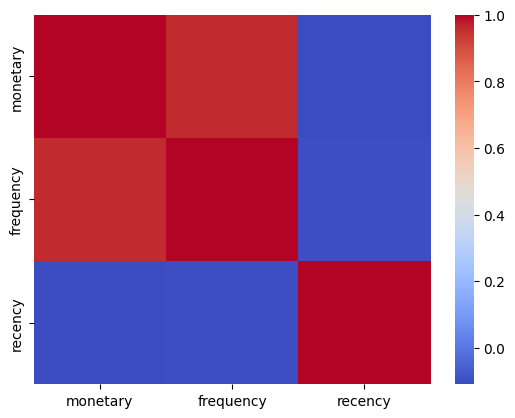

In [28]:
  sn.heatmap(clean_imp.corr(),cmap='coolwarm')

In [29]:
clean_imp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24874 entries, 1000661.0 to 99549900000000.0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   monetary   24874 non-null  float64
 1   frequency  24874 non-null  int64  
 2   recency    24874 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 777.3 KB


identify and remove outliers

<Axes: >

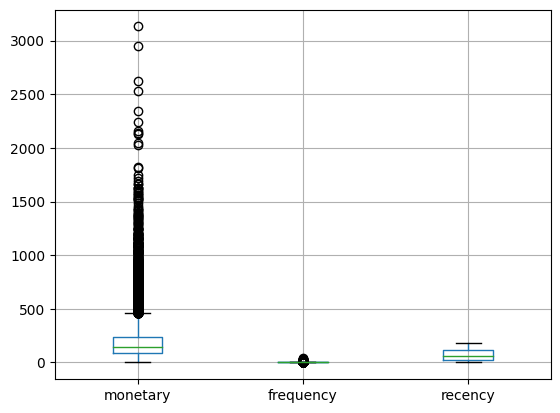

In [30]:
clean_imp.boxplot()

In [31]:
pip install feature_engine


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.3/344.3 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 22.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatibl

In [32]:
import pandas as pd
from feature_engine.outliers import Winsorizer
winsorizer = Winsorizer(capping_method='iqr', tail='right', fold=1.5, variables=['monetary'])
clean_imp = winsorizer.fit_transform(clean_imp)


In [33]:
import pandas as pd
from feature_engine.outliers import Winsorizer
winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['frequency'])
clean_imp = winsorizer.fit_transform(clean_imp)


<Axes: >

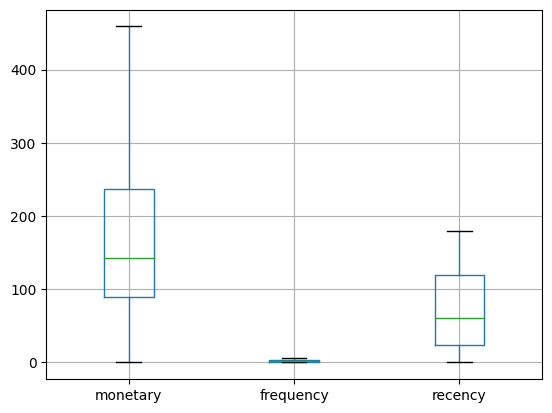

In [34]:
clean_imp.boxplot()

In [35]:
clean_imp.var()

monetary     14024.940298
frequency        2.269338
recency       2924.522588
dtype: float64

array([[<Axes: title={'center': 'monetary'}>,
        <Axes: title={'center': 'frequency'}>],
       [<Axes: title={'center': 'recency'}>, <Axes: >]], dtype=object)

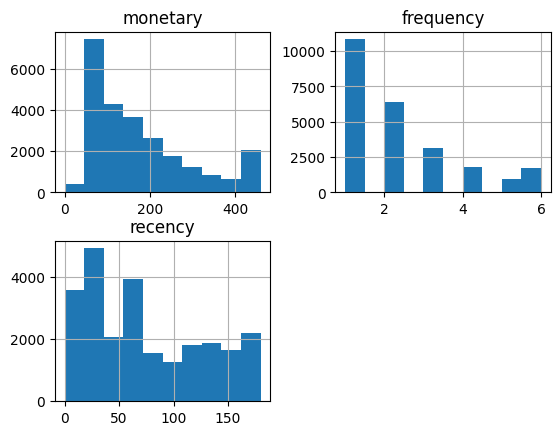

In [36]:
clean_imp.hist()

In [37]:
clean_imp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24874 entries, 1000661.0 to 99549900000000.0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   monetary   24874 non-null  float64
 1   frequency  24874 non-null  int64  
 2   recency    24874 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 777.3 KB


In [38]:
cols= list(clean_imp.columns)

data scaling

In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(clean_imp)

scaled_data = scaler.transform(clean_imp)


In [40]:
scaled_data

array([[0.5664488 , 0.4       , 0.12222222],
       [0.17254902, 0.        , 0.12222222],
       [0.51023965, 0.4       , 0.13333333],
       ...,
       [0.19389978, 0.        , 0.83888889],
       [0.58169935, 0.4       , 0.01666667],
       [0.13943355, 0.        , 0.02777778]])

In [41]:
df_pipelined = pd.DataFrame(scaled_data, columns = cols)

In [42]:
df_pipelined.index

RangeIndex(start=0, stop=24874, step=1)

Model building

In [43]:
from sklearn.cluster import KMeans
TWSS = []
k = list(range(1, 15))

for i in k:
    kmeans = KMeans(n_clusters = i,random_state=42)
    kmeans.fit(df_pipelined)
    TWSS.append(kmeans.inertia_)

TWSS


[6158.707075713108,
 3290.3117236861435,
 1882.1534961221307,
 1436.5701260968553,
 1135.2138936271847,
 958.0277492711506,
 784.7997111824207,
 765.513872336297,
 637.0340117198193,
 552.2446954724863,
 486.89175800614555,
 452.71661183932406,
 383.87927563440553,
 359.3689596875615]

Text(0, 0.5, 'total_within_SS')

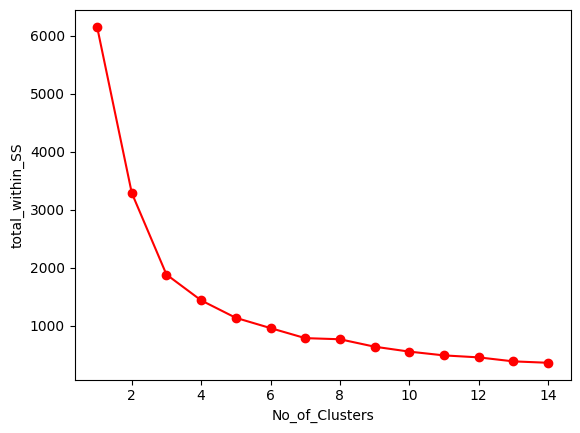

In [44]:
plt.plot(k, TWSS, 'ro-'); plt.xlabel("No_of_Clusters"); plt.ylabel("total_within_SS")

model evalution

In [45]:
from sklearn.metrics import silhouette_score

In [46]:
scores=[]
for i in range(2,8):
  kmeans = KMeans(n_clusters = i,random_state=42)
  result=kmeans.fit(df_pipelined)
  score = silhouette_score(df_pipelined, kmeans.labels_)
  scores.append(score)

In [47]:
for i in range(len(scores)):
  print(i+2," cluster =",scores[i])

2  cluster = 0.4631497141598631
3  cluster = 0.4636400393293836
4  cluster = 0.4475197905753096
5  cluster = 0.4392220719699902
6  cluster = 0.422485632570515
7  cluster = 0.42337140338280754


In [48]:
scores1=[]
for i in range(2,8):
  kmeans = KMeans(n_clusters = i,init='random',max_iter=70,verbose=3, tol=0.0001 ,n_init=15,random_state=42,algorithm="elkan")
  result=kmeans.fit(df_pipelined)
  score = silhouette_score(df_pipelined, kmeans.labels_)
  scores1.append(score)

Initialization complete
Iteration 0, inertia 6293.195501919964
Iteration 1, inertia 4643.024608967391
Iteration 2, inertia 4307.209997239218
Iteration 3, inertia 4211.410246905036
Iteration 4, inertia 4164.135704981978
Iteration 5, inertia 4118.9615264366785
Iteration 6, inertia 3869.970168454257
Iteration 7, inertia 3561.3611003342403
Iteration 8, inertia 3363.615192268721
Iteration 9, inertia 3294.215342100004
Iteration 10, inertia 3290.974553033643
Iteration 11, inertia 3290.4360520178884
Iteration 12, inertia 3290.3285133652726
Converged at iteration 12: center shift 1.4533693664419411e-06 within tolerance 8.25320559045997e-06.
Initialization complete
Iteration 0, inertia 6026.051316006193
Iteration 1, inertia 4434.48939342629
Iteration 2, inertia 4223.541926141617
Iteration 3, inertia 3749.7940319321083
Iteration 4, inertia 3360.3886298336074
Iteration 5, inertia 3298.560060995353
Iteration 6, inertia 3292.8685844206875
Iteration 7, inertia 3291.2644291902798
Iteration 8, inertia 

In [49]:
for i in range(len(scores1)):
  print(i+2," cluster =",scores1[i])


2  cluster = 0.4631715992691515
3  cluster = 0.46364763476909815
4  cluster = 0.4475197905753096
5  cluster = 0.4393019559297392
6  cluster = 0.42250484125210885
7  cluster = 0.423385603017762


Hyperparameter Tuning

In [50]:
kmeans = KMeans(n_clusters = 3,init='k-means++',max_iter=70,verbose=3, tol=0.0001 ,n_init=1,random_state=42)
result=kmeans.fit(df_pipelined)

Initialization complete
Iteration 0, inertia 3497.671074978285.
Iteration 1, inertia 2791.238200782441.
Iteration 2, inertia 2728.157278235969.
Iteration 3, inertia 2656.7784879744722.
Iteration 4, inertia 2285.4505217095475.
Iteration 5, inertia 1934.795845325035.
Iteration 6, inertia 1890.5230191261032.
Iteration 7, inertia 1883.6300643428888.
Iteration 8, inertia 1882.4385283420618.
Iteration 9, inertia 1882.2301455161485.
Converged at iteration 9: center shift 7.788213525763328e-06 within tolerance 8.25320559045997e-06.


In [51]:
mb = pd.Series(kmeans.labels_)
mb

0        0
1        0
2        0
3        2
4        0
        ..
24869    1
24870    0
24871    2
24872    0
24873    0
Length: 24874, dtype: int32

In [52]:
df_clust = pd.concat([mb, df_pipelined], axis = 1)
df_clust = df_clust.rename(columns = {0:'cluster_id'})
df_clust.head()

,cluster_id,monetary,frequency,recency
0,0,0.566449,0.4,0.122222
1,0,0.172549,0.0,0.122222
2,0,0.510240,0.4,0.133333
3,2,0.193900,0.0,0.755556
4,0,0.224401,0.2,0.366667


In [53]:
df_clust['cluster_id'].value_counts()

cluster_id
0    12474
2     7797
1     4603
Name: count, dtype: int64

visulization of cluster in 3D and 2D

In [54]:
import plotly.express as px
fig = px.scatter_3d(df_clust,
                    x="frequency",
                    y="monetary",
                    z="recency",
                    color='cluster_id',
                    hover_data=["frequency",
                                "monetary",
                                "recency"],
                    category_orders = {"cluster_id":
                                       [0,1,2]},
                    symbol = "cluster_id"
                    )

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

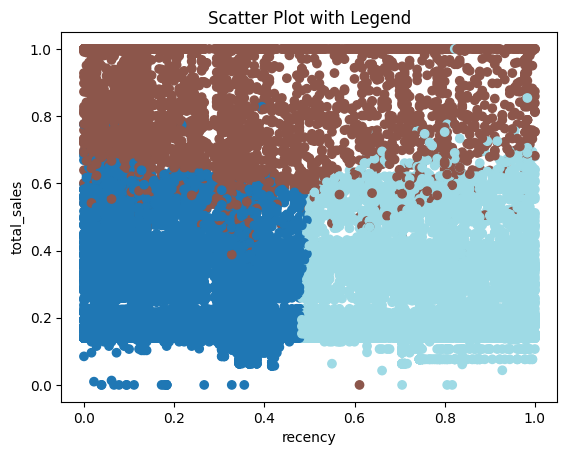

In [55]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Create the scatter plot
plt.scatter(df_clust['recency'],df_clust['monetary'] , c=df_clust['cluster_id'], cmap='tab20')  # Color by category

# Add labels and title
plt.xlabel("recency")
plt.ylabel("total_sales")
plt.title("Scatter Plot with Legend")
plt.show()